In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-32.472196217382084 -5.480569009687855
74.89706162567845 9.839646947210952
-88.22169691205426 53.39281045481087
76.54585858775914 -148.4021223669714
64.05404956633907 -82.56367863946339
83.74018770366598 -83.82069110185363
-10.99833179678923 -143.10901306875553
-68.30235563426446 -115.9866743068005
33.825891604317036 -18.092212489113678
-7.375824770118001 -41.96746655034835
54.12584559568958 6.905771864877437
87.17423297533614 -0.7722649135603206
70.08992812486449 14.525391198548135
59.0422598341724 13.1305378554637
-64.51481517192198 -24.170938265197634
88.40791126324726 136.9352589022282
-53.26789803870532 130.06413689359232
0.7189981173341948 109.94894945305771
-20.49860990518144 -176.53859829081463
-55.50867048434292 -66.29786903074964
26.69384300628525 -124.99879208793347
-42.494951264712434 -134.91416155673156
40.480979340365565 62.5559605883648
-70.51797147772872 145.44190478736135
-6.416782223594183 -134.34572665049552
2.6655663404253858 93.84565299344911
32.82521731831652 -17.

15.515798412003392 159.18272981942505
12.74883595576189 144.46725828751022
-27.295820198244023 -149.92812820400653
2.7712400793624994 -77.30359908517642
-65.5442661052248 -97.97657294483591
10.233188513875362 163.97419346710365
46.57798169663195 -75.91590249006505
-85.21124434475966 99.00371648197688
-20.353781740966866 135.1883297739467
-43.24951829025316 -65.88357465653723
62.832360733933456 -127.68086404273745
42.40580036032134 -30.501233087401687
-26.66625414964235 -58.42272857885685
-75.36745786540186 68.67809212772545
32.237809100617184 88.46767089957689
75.36824546870986 -48.83612043411446
8.546306046929217 -46.97087505039673
-63.260143867909086 -88.04649321540855
-31.547369867773405 -139.49599749000666
-3.419283015863954 -85.31203895158858
72.97471171501141 -132.2938234676937
88.42064216712947 -164.07784182168905
-43.6306678628239 136.3107459742011
-56.163060506883674 104.76881435823964
-60.364415286719286 167.49890759642972
-0.38412534713840785 62.075230811881795
-39.570207162

23.440096697106085 176.6819201829952
43.28374453055392 157.03610058249762
-49.01658858098188 159.61520743841658
55.70123222568 -21.939717851033294
75.99387238281363 88.92116185609751
-40.01086848832744 -72.14117853950864
23.288442878573818 146.4760931476601
-66.3470453632111 -27.095568934164703
-5.703098565435511 -121.71038172921318
80.01117008946053 70.10071587221333
81.91255850180394 107.96906613905583
-87.62691207618829 129.94044391824042
-38.570303274429214 175.42063023029954
19.396254651338566 37.48083954193402
85.60200317943247 32.90625255884635
80.95640922273941 34.371291864567155
-27.583284989548844 -171.83017744572578
-42.16302478009799 72.74706041687054
54.255406177748824 143.3389311089403
-63.98972842914604 -66.10417428429041
19.54792606493521 -0.5856299867823509
31.274674224443018 7.718082782859938
-78.22783146618653 49.14089667813238
-1.92645339311008 35.32881009588573
39.78381538939507 24.88513000413886
38.978999967836444 98.80320434911874
-13.978669673089627 159.64351312

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | oeiras
Processing Record 11 of Set 1 | norden
Processing Record 12 of Set 1 | stokmarknes
Processing Record 13 of Set 1 | skoghall
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 1 | mount gambier
Processing Record 17 of Set 1 | kuching
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | lompoc
Processing Record 21 of Set 1 | rik

Processing Record 32 of Set 4 | high level
Processing Record 33 of Set 4 | krasnaya gorbatka
Processing Record 34 of Set 4 | shubarkuduk
Processing Record 35 of Set 4 | burnie
Processing Record 36 of Set 4 | sao joao da barra
Processing Record 37 of Set 4 | progreso
Processing Record 38 of Set 4 | rio gallegos
Processing Record 39 of Set 4 | hamilton
Processing Record 40 of Set 4 | nandikotkur
Processing Record 41 of Set 4 | corinto
Processing Record 42 of Set 4 | praxedis guerrero
Processing Record 43 of Set 4 | hovd
Processing Record 44 of Set 4 | fukue
Processing Record 45 of Set 4 | kargil
Processing Record 46 of Set 4 | ketchikan
Processing Record 47 of Set 4 | carnarvon
Processing Record 48 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 49 of Set 4 | bathsheba
Processing Record 50 of Set 4 | pisco
Processing Record 1 of Set 5 | egvekinot
Processing Record 2 of Set 5 | conceicao do araguaia
Processing Record 3 of Set 5 | beloha
Processing Record 4 of Set 5 | pa

Processing Record 23 of Set 8 | meybod
Processing Record 24 of Set 8 | pangkalanbuun
Processing Record 25 of Set 8 | san quintin
Processing Record 26 of Set 8 | quesnel
Processing Record 27 of Set 8 | muncar
Processing Record 28 of Set 8 | rocha
Processing Record 29 of Set 8 | alto araguaia
Processing Record 30 of Set 8 | guiratinga
Processing Record 31 of Set 8 | batticaloa
Processing Record 32 of Set 8 | kuybyshevskiy zaton
Processing Record 33 of Set 8 | bafq
Processing Record 34 of Set 8 | husavik
Processing Record 35 of Set 8 | adeje
Processing Record 36 of Set 8 | labutta
City not found. Skipping...
Processing Record 37 of Set 8 | izhma
Processing Record 38 of Set 8 | hailar
Processing Record 39 of Set 8 | bafia
Processing Record 40 of Set 8 | lamu
Processing Record 41 of Set 8 | krasnoselkup
Processing Record 42 of Set 8 | teguise
Processing Record 43 of Set 8 | catamarca
Processing Record 44 of Set 8 | maputo
Processing Record 45 of Set 8 | kamenka
Processing Record 46 of Set 8

Processing Record 11 of Set 12 | grand gaube
Processing Record 12 of Set 12 | serenje
Processing Record 13 of Set 12 | champerico
Processing Record 14 of Set 12 | agadez
Processing Record 15 of Set 12 | carhuaz
Processing Record 16 of Set 12 | keti bandar
Processing Record 17 of Set 12 | beyneu
Processing Record 18 of Set 12 | mbanza-ngungu
Processing Record 19 of Set 12 | merrill
Processing Record 20 of Set 12 | fairbanks
Processing Record 21 of Set 12 | ust-kuyga
Processing Record 22 of Set 12 | zyryanovskiy
City not found. Skipping...
Processing Record 23 of Set 12 | luena
Processing Record 24 of Set 12 | urumqi
Processing Record 25 of Set 12 | harper
Processing Record 26 of Set 12 | maarianhamina
Processing Record 27 of Set 12 | touros
Processing Record 28 of Set 12 | broome
Processing Record 29 of Set 12 | rodeo
Processing Record 30 of Set 12 | vao
Processing Record 31 of Set 12 | victor harbor
Processing Record 32 of Set 12 | miami
Processing Record 33 of Set 12 | sisimiut
Proces

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,83.05,63,40,9.22,US,2022-07-01 21:33:18
1,Port Alfred,-33.5906,26.8910,67.80,42,0,14.12,ZA,2022-07-01 21:37:59
2,Barrow,71.2906,-156.7887,46.42,71,0,11.50,US,2022-07-01 21:34:24
3,Qaanaaq,77.4840,-69.3632,42.71,68,66,4.45,GL,2022-07-01 21:38:00
4,Atuona,-9.8000,-139.0333,77.36,73,3,8.37,PF,2022-07-01 21:38:00
5,Punta Arenas,-53.1500,-70.9167,35.71,69,0,5.75,CL,2022-07-01 21:38:00
6,Ponta Do Sol,32.6667,-17.1000,71.01,80,11,3.38,PT,2022-07-01 21:38:01
7,Oeiras,-7.0253,-42.1311,83.64,51,73,13.91,BR,2022-07-01 21:38:01
8,Norden,53.6000,7.2000,61.97,81,2,9.82,DE,2022-07-01 21:38:01
9,Stokmarknes,68.5646,14.9108,69.76,77,0,5.75,NO,2022-07-01 21:38:02


In [12]:
# reorder columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-07-01 21:33:18,42.0970,-79.2353,83.05,63,40,9.22
1,Port Alfred,ZA,2022-07-01 21:37:59,-33.5906,26.8910,67.80,42,0,14.12
2,Barrow,US,2022-07-01 21:34:24,71.2906,-156.7887,46.42,71,0,11.50
3,Qaanaaq,GL,2022-07-01 21:38:00,77.4840,-69.3632,42.71,68,66,4.45
4,Atuona,PF,2022-07-01 21:38:00,-9.8000,-139.0333,77.36,73,3,8.37
5,Punta Arenas,CL,2022-07-01 21:38:00,-53.1500,-70.9167,35.71,69,0,5.75
6,Ponta Do Sol,PT,2022-07-01 21:38:01,32.6667,-17.1000,71.01,80,11,3.38
7,Oeiras,BR,2022-07-01 21:38:01,-7.0253,-42.1311,83.64,51,73,13.91
8,Norden,DE,2022-07-01 21:38:01,53.6000,7.2000,61.97,81,2,9.82
9,Stokmarknes,NO,2022-07-01 21:38:02,68.5646,14.9108,69.76,77,0,5.75


In [13]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

<function matplotlib.pyplot.show(close=None, block=None)>

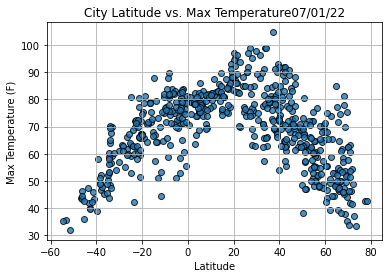

In [15]:
# Imoport time module

import time

# build the scatter plot for latitude vs. max tempterature

plt.scatter(lats, 
            max_temps, 
           edgecolor="black", linewidths=1, marker="o",
           alpha = 0.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig1.png")

# show plot.

plt.show

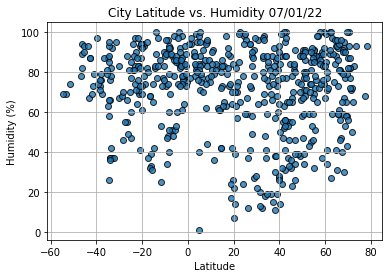

In [16]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

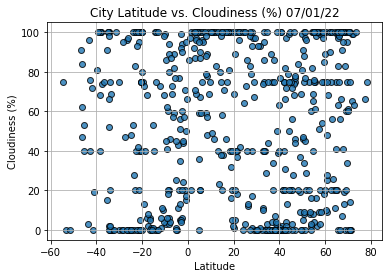

In [17]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

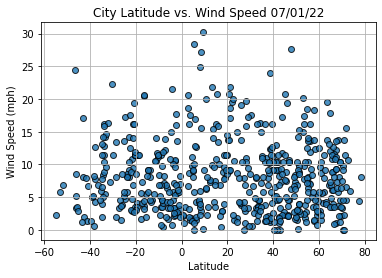

In [18]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [28]:
# Import linregress

from scipy.stats import linregress


# Create a function to create perform linear regression on the weather data
#and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    
    #Calculate the regression line "y values" from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    
    # Create a scatter plot and plot the regression line.
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation,
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    
    plt.show()

In [20]:
index13 = city_data_df.loc[13]

index13

City                      Kuching
Country                        MY
Date          2022-07-01 21:38:05
Lat                          1.55
Lng                      110.3333
Max Temp                    79.02
Humidity                       94
Cloudiness                     20
Wind Speed                   3.44
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
562    False
563     True
564     True
565    False
566     True
Name: Lat, Length: 567, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-07-01 21:33:18,42.0970,-79.2353,83.05,63,40,9.22
2,Barrow,US,2022-07-01 21:34:24,71.2906,-156.7887,46.42,71,0,11.50
3,Qaanaaq,GL,2022-07-01 21:38:00,77.4840,-69.3632,42.71,68,66,4.45
6,Ponta Do Sol,PT,2022-07-01 21:38:01,32.6667,-17.1000,71.01,80,11,3.38
8,Norden,DE,2022-07-01 21:38:01,53.6000,7.2000,61.97,81,2,9.82


In [25]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

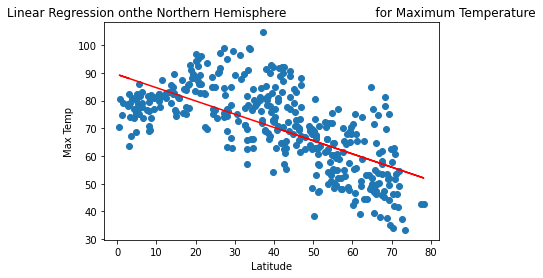

In [29]:
# Linear regression on the Northern Hemisphere.

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values,  y_values,
                      'Linear Regression onthe Northern Hemisphere \
                      for Maximum Temperature', 'Max Temp', (10,200))

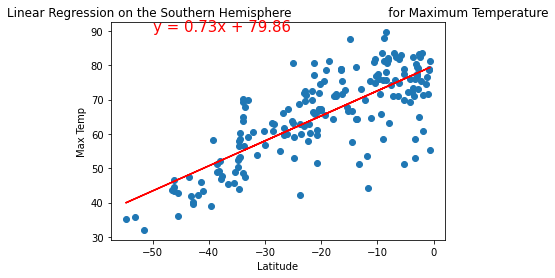

In [30]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

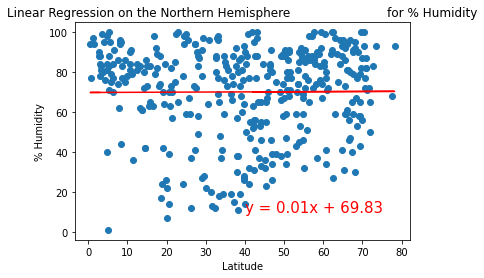

In [31]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

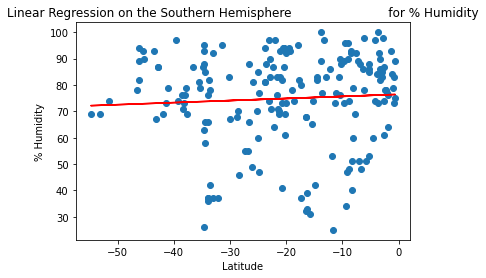

In [32]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

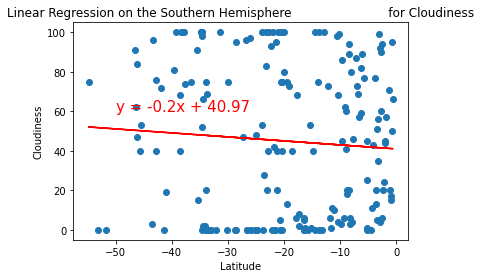

In [34]:
x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloudiness', 'Cloudiness',(-50,60))

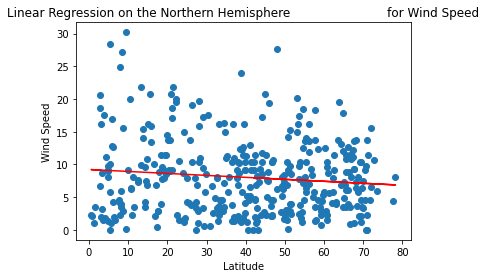

In [35]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

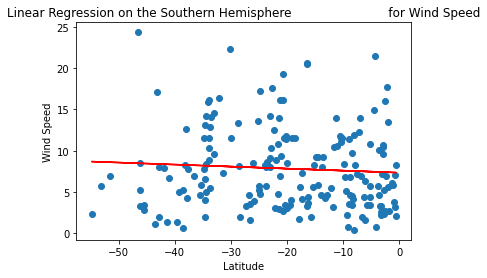

In [36]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))